In [1]:
import pandas as pd
import json
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Excluding Others Category

/content/drive/MyDrive/Excluding Others Category


In [ ]:
df= pd.read_csv('df_stp_words_lemmatised.csv').drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])

In [5]:
  df.head()

NameError: name 'df' is not defined

In [ ]:
# Ensure the grievances column is treated as a string
df['grievances'] = df['cleaned_grievance'].astype(str)

# Calculate the length of each grievance
df['grievance_length'] = df['grievances'].apply(len)

# Calculate the average length of grievances
average_length = df['grievance_length'].mean()

print(f"The average length of grievances is: {average_length}")

The average length of grievances is: 669.8981751752348


In [ ]:
len(df['cleaned_grievance'][0])

406

In [ ]:
len(df['cleaned_grievance'])

100722

In [ ]:
df['org_code'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100722 entries, 0 to 100721
Series name: org_code
Non-Null Count   Dtype 
--------------   ----- 
100722 non-null  object
dtypes: object(1)
memory usage: 787.0+ KB


In [ ]:
df['org_code'].isnull().sum()

0

In [ ]:
df['org_code'].unique()

array(['MORLY', 'GOVUP', 'MOLBR', 'MODEF', 'MEAPD', 'DORLD', 'DOTEL',
       'GOVTG', 'MINHA', 'MOPRJ', 'DTOUR', 'GOVAS', 'DPLNG', 'CBODT',
       'DARPG', 'DODAF', 'MINIT', 'MOIAB', 'GOVJH', 'DHLTH', 'DLGLA',
       'MTRBL', 'DEABD', 'DOSEL', 'DOPAT', 'GOVMH', 'DDESW', 'LGVED',
       'DOCAF', 'DOCOM', 'DOEAF', 'DEPOJ', 'DPOST', 'DOSIR', 'GOVCC',
       'GOVTN', 'MOEAF', 'MORTH', 'GNCTD', 'GOVRJ', 'GOVBH', 'DOURD',
       'UIDAI', 'AYUSH', 'DOAAC', 'DSEHE', 'DOSAT', 'DEAID', 'GOVHY',
       'DSPRT', 'DCOYA', 'FADSS', 'MPOWR', 'GOVTR', 'MPANG', 'CBOEC',
       'DOLDR', 'GOVPB', 'MOSJE', 'DOFPD', 'DOWCD', 'MOCOP', 'MOCAV',
       'DCLTR', 'GOVKL', 'MINPA', 'DPHAM', 'MINWR', 'GOVJK', 'GOVMP',
       'DHIND', 'DEAPR', 'DHRES', 'MOSPI', 'MMSME', 'DODIV', 'GOVGJ',
       'DOEXP', 'GOVOR', 'DDRDO', 'GOVWB', 'AGPS5', 'BSFOR', 'CGAT4',
       'CLC10', 'CMPFO', 'DMAFF', 'DOARE', 'DOCPC', 'DODWS', 'DOFPI',
       'DOIPP', 'DOPPW', 'DORVU', 'MEAPM', 'GOVAN', 'GOVAP', 'GOVGO',
       'GOVKN', 'GOV

In [ ]:
len(df['org_code'].unique())

192

In [ ]:
df['org_code'].value_counts()

PMOPG    18873
MOLBR     9901
DEABD     6232
CBODT     6022
DOTEL     4186
         ...  
LEOR2        1
CGMUW        1
IRSEC        1
CBS01        1
RBSP6        1
Name: org_code, Length: 192, dtype: int64

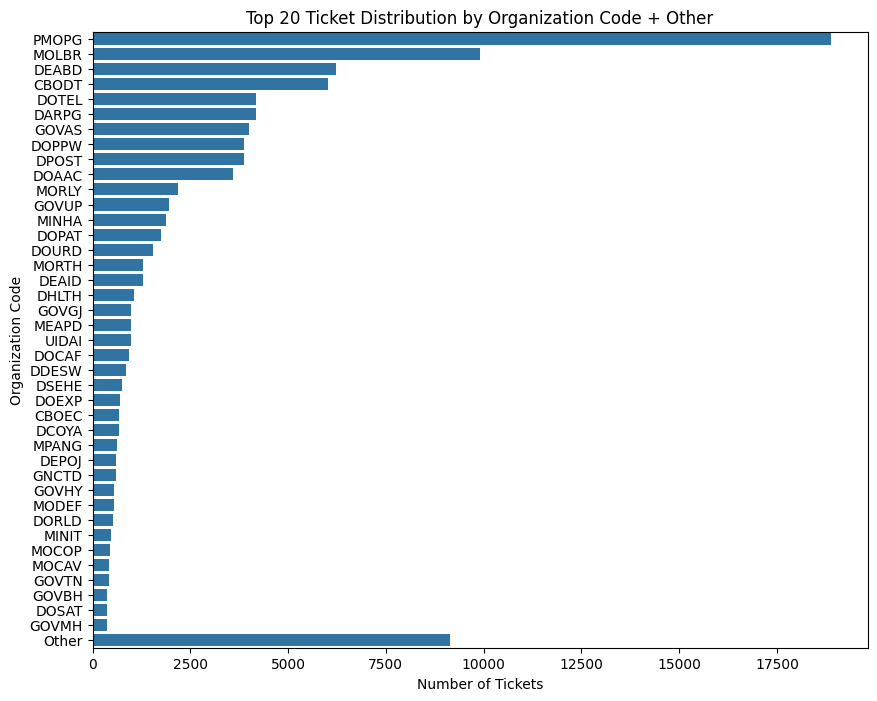

In [ ]:
# Assuming 'df' is your DataFrame and 'org_code' is the column of interest
org_code_counts = df['org_code'].value_counts()

# Choose the number of top codes to display
top_n = 40

# Create a DataFrame for the top N codes
top_org_codes = org_code_counts.head(top_n).copy()

# Sum the counts of all other codes and add them as 'Other'
top_org_codes['Other'] = org_code_counts[top_n:].sum()

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=top_org_codes.values, y=top_org_codes.index)
plt.title('Top 20 Ticket Distribution by Organization Code + Other')
plt.xlabel('Number of Tickets')
plt.ylabel('Organization Code')
plt.show()

In [ ]:
df['org_code'].value_counts().mean()

524.59375

In [ ]:
df['org_code'].value_counts().median()

47.5

In [ ]:
df.head()

,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma,grievances,grievance_length
0,MORLY/E/2023/0000001,MORLY,To The Railway Board SDAH ER Location ...,To The Railway Board SDAH ER Location Madhyamg...,Railway Board SDAH ER Location Madhyamgram inf...,Railway Board SDAH ER Location Madhyamgram inf...,To The Railway Board SDAH ER Location Madhyamg...,406
1,GOVUP/E/2023/0000001,GOVUP,"XAXPX/X/X0X2X4X0X0 REGARDING CBCID INSPECTION,...",REGARDING CBCID INSPECTION closed on wrong fac...,CBCID INSPECTION closed wrong facts investigat...,CBCID INSPECTION close wrong fact investigate ...,REGARDING CBCID INSPECTION closed on wrong fac...,1506
2,MOLBR/E/2023/0000001,MOLBR,Dear sir madam My name is RUDRARAM RAJU My P...,Dear sir madam My name is RUDRARAM RAJU My PF ...,Dear sir madam RUDRARAM RAJU PF number company...,dear sir madam RUDRARAM RAJU PF number company...,Dear sir madam My name is RUDRARAM RAJU My PF ...,383
3,MOLBR/E/2023/0000002,MOLBR,DEAR SIR MAI SHRI HEMANT KUMAR CHAVHAN MAI MS ...,DEAR SIR MAI SHRI HEMANT KUMAR CHAVHAN MAI MS ...,DEAR SIR MAI SHRI HEMANT KUMAR CHAVHAN MAI MS ...,DEAR SIR MAI SHRI HEMANT KUMAR CHAVHAN MAI MS ...,DEAR SIR MAI SHRI HEMANT KUMAR CHAVHAN MAI MS ...,544
4,GOVUP/E/2023/0000002,GOVUP,"XAXPX/X/X0X2X4X0X8 REGARDING CBCID INSPECTION,...",REGARDING CBCID INSPECTION closed on wrong fac...,CBCID INSPECTION closed wrong facts investigat...,CBCID INSPECTION close wrong fact investigate ...,REGARDING CBCID INSPECTION closed on wrong fac...,1506


In [ ]:
df[df['org_code']=='GOVUP']['grievance_length'] > 500

1          True
4          True
5          True
13         True
42         True
          ...  
100298     True
100362     True
100553    False
100586    False
100625     True
Name: grievance_length, Length: 1944, dtype: bool

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame and it already contains a 'grievance_length' column.
# If 'grievance_length' column doesn't exist, you'll need to create it as shown in the previous example.

# Calculate the mean value of ticket counts per org_code
mean_value = df['org_code'].value_counts().mean()

# Create an empty DataFrame to store the under-sampled data
balanced_df = pd.DataFrame()

# Loop over each unique org_code
for org_code in df['org_code'].unique():
    # Filter the DataFrame to only the current org_code
    org_code_df = df[df['org_code'] == org_code]

    # Apply additional filtering for grievance_length > 500 before under-sampling
    filtered_org_code_df = org_code_df[org_code_df['grievance_length'] > 500]

    # Determine if under-sampling is needed based on the mean value and apply it if the condition is met
    if len(filtered_org_code_df) > mean_value:
        under_sampled_df = filtered_org_code_df.sample(n=int(mean_value), random_state=42)
    else:
        under_sampled_df = filtered_org_code_df

    # Append the under-sampled (or filtered if under-sampling wasn't needed) DataFrame to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, under_sampled_df], ignore_index=True)

# Reset the index of the balanced DataFrame (this is now redundant due to the use of ignore_index=True in pd.concat)
# balanced_df.reset_index(drop=True, inplace=True)


In [ ]:
balanced_df.head()

,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma,grievances,grievance_length
0,MORLY/E/2023/0000833,MORLY,"Dear Sir Jaihind, ...",Dear Sir Jaihind Sir would like brought your k...,Dear Sir Jaihind Sir like brought kind notice ...,Dear Sir Jaihind Sir like bring kind notice ea...,Dear Sir Jaihind Sir would like brought your k...,504
1,MORLY/E/2023/0000192,MORLY,I HAVE SELECTED FOR RAILWAYS THROUGH RRB AS AS...,HAVE SELECTED FOR RAILWAYS THROUGH RRB AS ASSI...,SELECTED RAILWAYS RRB ASSISTANT STATION MASTER...,SELECTED RAILWAYS RRB ASSISTANT STATION MASTER...,HAVE SELECTED FOR RAILWAYS THROUGH RRB AS ASSI...,757
2,MORLY/E/2023/0000560,MORLY,"At wadi junction railway station Tea, water bo...",At wadi junction railway station Tea water bot...,wadi junction railway station Tea water bottle...,wadi junction railway station Tea water bottle...,At wadi junction railway station Tea water bot...,533
3,MORLY/E/2023/0001502,MORLY,"Respected sir, I, Mr. SALEELAN. N. is one of ...",Respected sir Mr SALEELAN is one of the Kerali...,Respected sir Mr SALEELAN Keralites living Boi...,respected sir Mr SALEELAN Keralites live Boisa...,Respected sir Mr SALEELAN is one of the Kerali...,833
4,MORLY/E/2023/0002019,MORLY,"On 6th 2022 December, I was traveling with my ...",On th December was traveling with my family an...,th December traveling family friendgirl train ...,th December travel family friendgirl train nam...,On th December was traveling with my family an...,1818


In [ ]:
df.shape

(100722, 8)

In [ ]:
balanced_df.shape

(20216, 8)

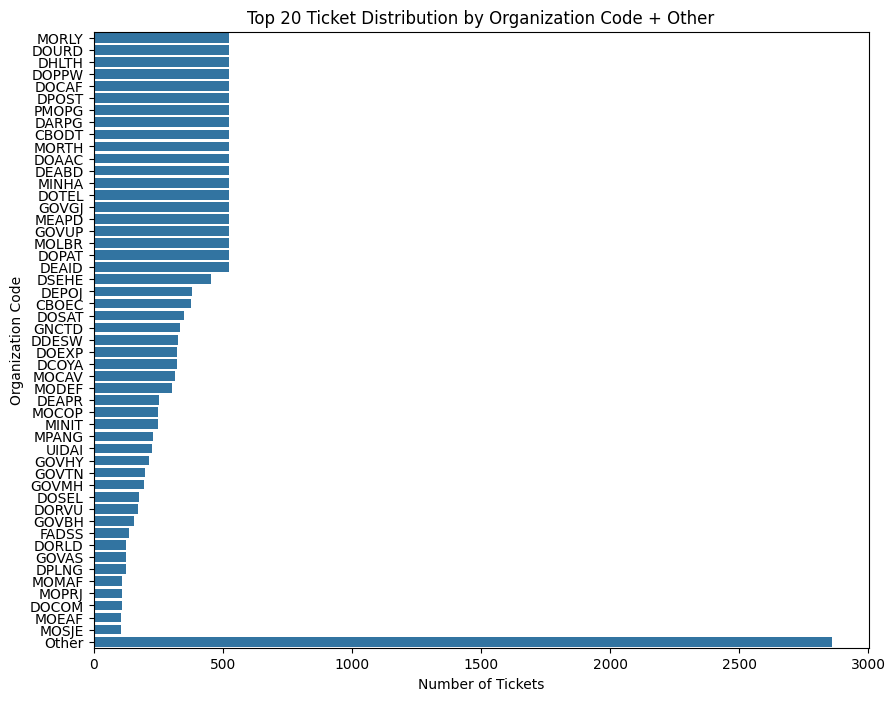

In [ ]:
# Assuming 'df' is your DataFrame and 'org_code' is the column of interest
org_code_counts = balanced_df['org_code'].value_counts()

# Choose the number of top codes to display
top_n = 50

# Create a DataFrame for the top N codes
top_org_codes = org_code_counts.head(top_n).copy()

# Sum the counts of all other codes and add them as 'Other'
top_org_codes['Other'] = org_code_counts[top_n:].sum()

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=top_org_codes.values, y=top_org_codes.index)
plt.title('Top 20 Ticket Distribution by Organization Code + Other')
plt.xlabel('Number of Tickets')
plt.ylabel('Organization Code')
plt.show()

In [ ]:
balanced_df[balanced_df['org_code']=='MOSJE']

,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma,grievances,grievance_length
15249,MOSJE/E/2023/0000010,MOSJE,The Governing council of FLUID CONTROL RESEAR...,The Governing council of FLUID CONTROL RESEARC...,Governing council FLUID CONTROL RESEARCH INSTI...,govern council FLUID CONTROL RESEARCH INSTITUT...,The Governing council of FLUID CONTROL RESEARC...,1589
15250,MOSJE/E/2023/0000018,MOSJE,Sub: contempt of court making by the AGM of ca...,Sub contempt of court making by the AGM of can...,Sub contempt court making AGM canara bank impl...,sub contempt court make AGM canara bank implem...,Sub contempt of court making by the AGM of can...,819
15251,MOSJE/E/2023/0000024,MOSJE,"Dear Sir/Madam, I have been submitting petiti...",Dear SirMadam have been submitting petitions t...,Dear SirMadam submitting petitions NCSC Kolkat...,Dear SirMadam submit petition NCSC Kolkata Off...,Dear SirMadam have been submitting petitions t...,1859
15252,MOSJE/E/2023/0000026,MOSJE,Respected sir branch manager of bank of india ...,Respected sir branch manager of bank of india ...,Respected sir branch manager bank india padma ...,respected sir branch manager bank india padma ...,Respected sir branch manager of bank of india ...,837
15253,MOSJE/E/2023/0000027,MOSJE,dear sir branch manager of bank of india padma...,dear sir branch manager of bank of india padma...,dear sir branch manager bank india padma branc...,dear sir branch manager bank india padma branc...,dear sir branch manager of bank of india padma...,614
...,...,...,...,...,...,...,...,...
15350,MOSJE/E/2023/0000296,MOSJE,To Under Secretory ministry of social justice...,To Under Secretory ministry of social justice ...,Secretory ministry social justice Govt india D...,secretory ministry social justice Govt india D...,To Under Secretory ministry of social justice ...,1642
15351,MOSJE/E/2023/0000297,MOSJE,"As per Allocation of Business Rules, Clause A(...",As per Allocation of Business Rules Clause AI ...,Allocation Business Rules Clause AI DoPT gener...,Allocation Business Rules Clause AI DoPT gener...,As per Allocation of Business Rules Clause AI ...,998
15352,MOSJE/E/2023/0000303,MOSJE,"Respected Sir, With reference to your above ...",Respected Sir With reference to your above let...,Respected Sir reference letter Sumanta Dutta b...,Respected Sir reference letter Sumanta Dutta b...,Respected Sir With reference to your above let...,1098
15353,MOSJE/E/2023/0000305,MOSJE,"Sir, I Nomusankar Setty Founder and President...",Sir Nomusankar Setty Founder and President of ...,Sir Nomusankar Setty Founder President JOSHI W...,Sir Nomusankar Setty Founder President JOSHI W...,Sir Nomusankar Setty Founder and President of ...,665


In [ ]:
import pandas as pd

# Calculate the counts of each org_code
org_code_counts = balanced_df['org_code'].value_counts()

# Filter org_code values where the count is greater than 50
org_codes_to_keep = org_code_counts[org_code_counts <106].index

# Filter balanced_df to only include rows with org_code values that have more than 50 occurrences
Others_df = balanced_df[balanced_df['org_code'].isin(org_codes_to_keep)]

# Now, filtered_df contains only the rows where the org_code appears more than 50 times


In [ ]:
Others_df.head()

,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma,grievances,grievance_length
3052,GOVTG/E/2023/0000001,GOVTG,My INDIAN Passport number: X7X3X4X0 My Imm...,My INDIAN Passport number My Immigration Newze...,INDIAN Passport number Immigration Newzealand ...,INDIAN Passport number Immigration Newzealand ...,My INDIAN Passport number My Immigration Newze...,806
3053,GOVTG/E/2023/0000002,GOVTG,. My INDIAN Passport number: X7X3X4X0 My ...,My INDIAN Passport number My Immigration Newze...,INDIAN Passport number Immigration Newzealand ...,INDIAN Passport number Immigration Newzealand ...,My INDIAN Passport number My Immigration Newze...,806
3054,GOVTG/E/2023/0000004,GOVTG,My father was a retired Railway police worked ...,My father was a retired Railway police worked ...,father retired Railway police worked head cons...,father retire Railway police work head constab...,My father was a retired Railway police worked ...,557
3055,GOVTG/E/2023/0000005,GOVTG,Dear CM Sir - Bhadrachalam is a wonderful pilg...,Dear CM Sir Bhadrachalam is a wonderful pilgri...,Dear CM Sir Bhadrachalam wonderful pilgrim cen...,dear CM Sir Bhadrachalam wonderful pilgrim cen...,Dear CM Sir Bhadrachalam is a wonderful pilgri...,562
3056,GOVTG/E/2023/0000006,GOVTG,This is not a Grievance but Feedback from a Ge...,This is not a Grievance but Feedback from a Ge...,Grievance Feedback General Person AAM Aadmi Lo...,grievance Feedback General Person AAM Aadmi lo...,This is not a Grievance but Feedback from a Ge...,1600


In [ ]:
Others_df.shape

(2858, 8)

In [ ]:
others_category = Others_df['org_code'].unique()

In [ ]:
len(Others_df['org_code'].unique())

86

<Axes: xlabel='count', ylabel='org_code'>

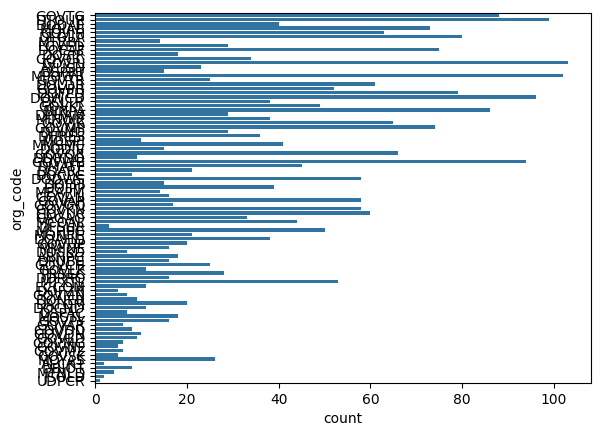

In [ ]:
sns.countplot(Others_df['org_code'])

In [ ]:
others_category

array(['GOVTG', 'DTOUR', 'DODAF', 'MOIAB', 'GOVJH', 'DLGLA', 'MTRBL',
       'LGVED', 'DOEAF', 'DOSIR', 'GOVCC', 'GOVRJ', 'AYUSH', 'DSPRT',
       'MPOWR', 'GOVTR', 'DOLDR', 'GOVPB', 'DOFPD', 'DOWCD', 'DCLTR',
       'GOVKL', 'MINPA', 'DPHAM', 'MINWR', 'GOVJK', 'GOVMP', 'DHIND',
       'DHRES', 'MOSPI', 'MMSME', 'DODIV', 'GOVOR', 'DDRDO', 'GOVWB',
       'DMAFF', 'DOARE', 'DOCPC', 'DODWS', 'DOFPI', 'DOIPP', 'MEAPM',
       'GOVAN', 'GOVAP', 'GOVGO', 'GOVKN', 'GOVUC', 'CAGAO', 'MCOAL',
       'DFSHR', 'MSHPG', 'MONRE', 'DOAHD', 'GOVHP', 'MMINE', 'DOSKD',
       'ARNPG', 'DPUBE', 'GOVCH', 'GOVLK', 'PRSEC', 'DDPRO', 'MTXTL',
       'ECCOM', 'DOFZR', 'GOVMN', 'DONER', 'DATOM', 'DOCND', 'DSPAC',
       'MOSTL', 'GOVPY', 'GOVAR', 'GOVDD', 'GOVDN', 'GOVLD', 'GOVMG',
       'GOVNL', 'GOVMZ', 'GOVSK', 'MOYAS', 'ALCK1', 'DBIOT', 'MTNLD',
       'JSOLD', 'UDPCR'], dtype=object)

In [ ]:
balanced_df['org_code'] = balanced_df['org_code'].apply(lambda x: 'others' if x in others_category else x)

In [ ]:
balanced_df.head()

,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma,grievances,grievance_length
0,MORLY/E/2023/0000833,MORLY,"Dear Sir Jaihind, ...",Dear Sir Jaihind Sir would like brought your k...,Dear Sir Jaihind Sir like brought kind notice ...,Dear Sir Jaihind Sir like bring kind notice ea...,Dear Sir Jaihind Sir would like brought your k...,504
1,MORLY/E/2023/0000192,MORLY,I HAVE SELECTED FOR RAILWAYS THROUGH RRB AS AS...,HAVE SELECTED FOR RAILWAYS THROUGH RRB AS ASSI...,SELECTED RAILWAYS RRB ASSISTANT STATION MASTER...,SELECTED RAILWAYS RRB ASSISTANT STATION MASTER...,HAVE SELECTED FOR RAILWAYS THROUGH RRB AS ASSI...,757
2,MORLY/E/2023/0000560,MORLY,"At wadi junction railway station Tea, water bo...",At wadi junction railway station Tea water bot...,wadi junction railway station Tea water bottle...,wadi junction railway station Tea water bottle...,At wadi junction railway station Tea water bot...,533
3,MORLY/E/2023/0001502,MORLY,"Respected sir, I, Mr. SALEELAN. N. is one of ...",Respected sir Mr SALEELAN is one of the Kerali...,Respected sir Mr SALEELAN Keralites living Boi...,respected sir Mr SALEELAN Keralites live Boisa...,Respected sir Mr SALEELAN is one of the Kerali...,833
4,MORLY/E/2023/0002019,MORLY,"On 6th 2022 December, I was traveling with my ...",On th December was traveling with my family an...,th December traveling family friendgirl train ...,th December travel family friendgirl train nam...,On th December was traveling with my family an...,1818


In [ ]:
balanced_df['org_code'].value_counts()

others    2858
MORLY      524
DHLTH      524
DOPPW      524
GOVGJ      524
DOAAC      524
DOURD      524
MORTH      524
GOVUP      524
DPOST      524
DOCAF      524
DOPAT      524
DEABD      524
PMOPG      524
MEAPD      524
MINHA      524
DOTEL      524
DARPG      524
MOLBR      524
CBODT      524
DEAID      523
DSEHE      454
DEPOJ      380
CBOEC      376
DOSAT      351
GNCTD      334
DDESW      328
DOEXP      324
DCOYA      323
MOCAV      314
MODEF      305
DEAPR      252
MOCOP      250
MINIT      250
MPANG      232
UIDAI      227
GOVHY      215
GOVTN      199
GOVMH      196
DOSEL      178
DORVU      173
GOVBH      157
FADSS      137
DORLD      127
GOVAS      126
DPLNG      126
MOMAF      112
MOPRJ      111
DOCOM      109
MOEAF      107
MOSJE      106
Name: org_code, dtype: int64

In [ ]:
balanced_df.head()

,_id,org_code,clean_text,cleaned_grievance,text_topic_modeling,cleaned_lemma,grievances,grievance_length
0,MORLY/E/2023/0000833,MORLY,"Dear Sir Jaihind, ...",Dear Sir Jaihind Sir would like brought your k...,Dear Sir Jaihind Sir like brought kind notice ...,Dear Sir Jaihind Sir like bring kind notice ea...,Dear Sir Jaihind Sir would like brought your k...,504
1,MORLY/E/2023/0000192,MORLY,I HAVE SELECTED FOR RAILWAYS THROUGH RRB AS AS...,HAVE SELECTED FOR RAILWAYS THROUGH RRB AS ASSI...,SELECTED RAILWAYS RRB ASSISTANT STATION MASTER...,SELECTED RAILWAYS RRB ASSISTANT STATION MASTER...,HAVE SELECTED FOR RAILWAYS THROUGH RRB AS ASSI...,757
2,MORLY/E/2023/0000560,MORLY,"At wadi junction railway station Tea, water bo...",At wadi junction railway station Tea water bot...,wadi junction railway station Tea water bottle...,wadi junction railway station Tea water bottle...,At wadi junction railway station Tea water bot...,533
3,MORLY/E/2023/0001502,MORLY,"Respected sir, I, Mr. SALEELAN. N. is one of ...",Respected sir Mr SALEELAN is one of the Kerali...,Respected sir Mr SALEELAN Keralites living Boi...,respected sir Mr SALEELAN Keralites live Boisa...,Respected sir Mr SALEELAN is one of the Kerali...,833
4,MORLY/E/2023/0002019,MORLY,"On 6th 2022 December, I was traveling with my ...",On th December was traveling with my family an...,th December traveling family friendgirl train ...,th December travel family friendgirl train nam...,On th December was traveling with my family an...,1818


In [ ]:
final_df = balanced_df[['cleaned_grievance','org_code']]

In [ ]:
final_df.head()

,cleaned_grievance,org_code
0,Dear Sir Jaihind Sir would like brought your k...,MORLY
1,HAVE SELECTED FOR RAILWAYS THROUGH RRB AS ASSI...,MORLY
2,At wadi junction railway station Tea water bot...,MORLY
3,Respected sir Mr SALEELAN is one of the Kerali...,MORLY
4,On th December was traveling with my family an...,MORLY


In [ ]:
final_df.shape

(20216, 2)

In [ ]:
final_df.to_csv('final_df.csv')

In [7]:
data = pd.read_csv('final_df.csv')

In [8]:
data.head()

,Unnamed: 0,cleaned_grievance,org_code
0,0,Dear Sir Jaihind Sir would like brought your k...,MORLY
1,1,HAVE SELECTED FOR RAILWAYS THROUGH RRB AS ASSI...,MORLY
2,2,At wadi junction railway station Tea water bot...,MORLY
3,3,Respected sir Mr SALEELAN is one of the Kerali...,MORLY
4,4,On th December was traveling with my family an...,MORLY


In [9]:
# Assuming 'data' is your DataFrame and 'org_code' is the column with categorical labels
labels, unique_labels = pd.factorize(data['org_code'])

# Create a mapping dictionary from original labels to encoded labels
label_mapping = {original_label: encoded_label for encoded_label, original_label in enumerate(unique_labels)}

# Optionally, if you want to map encoded labels back to the original labels
reverse_mapping = {encoded_label: original_label for original_label, encoded_label in label_mapping.items()}

# Add the encoded labels back to your DataFrame if needed
data['encoded_labels'] = labels

In [10]:
label_mapping

{'MORLY': 0,
 'GOVUP': 1,
 'MOLBR': 2,
 'MODEF': 3,
 'MEAPD': 4,
 'DORLD': 5,
 'DOTEL': 6,
 'others': 7,
 'MINHA': 8,
 'MOPRJ': 9,
 'GOVAS': 10,
 'DPLNG': 11,
 'CBODT': 12,
 'DARPG': 13,
 'MINIT': 14,
 'DHLTH': 15,
 'DEABD': 16,
 'DOSEL': 17,
 'DOPAT': 18,
 'GOVMH': 19,
 'DDESW': 20,
 'DOCAF': 21,
 'DOCOM': 22,
 'DEPOJ': 23,
 'DPOST': 24,
 'GOVTN': 25,
 'MOEAF': 26,
 'MORTH': 27,
 'GNCTD': 28,
 'GOVBH': 29,
 'DOURD': 30,
 'UIDAI': 31,
 'DOAAC': 32,
 'DSEHE': 33,
 'DOSAT': 34,
 'DEAID': 35,
 'GOVHY': 36,
 'DCOYA': 37,
 'FADSS': 38,
 'MPANG': 39,
 'CBOEC': 40,
 'MOSJE': 41,
 'MOCOP': 42,
 'MOCAV': 43,
 'DEAPR': 44,
 'GOVGJ': 45,
 'DOEXP': 46,
 'DOPPW': 47,
 'DORVU': 48,
 'MOMAF': 49,
 'PMOPG': 50}

In [ ]:
from sklearn.model_selection import train_test_split

# Dropping the 'Unnamed: 0' column as it's just an index
data = data.drop(columns=['Unnamed: 0'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_grievance'], data['org_code'], test_size=0.2, random_state=42,stratify=data['org_code'])

# Display the size of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((16172,), (4044,), (16172,), (4044,))

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and prepare for training (a simplified example)
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=128)

# Convert labels to a format that the model can understand (e.g., to tensor)
import torch

y_train = torch.tensor(y_train.factorize()[0])
y_test = torch.tensor(y_test.factorize()[0])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# !pip install accelerate -U

In [ ]:
# !pip install transformers[torch] -U

In [ ]:
# !pip install accelerate

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(y_train.unique()))


def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


# Training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory for model and logs
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=8,   # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

# Create a Trainer to train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_encodings,
    eval_dataset=test_encodings,
    compute_metrics=compute_metrics, # You'll need to define a function for metrics
)

# Train the model
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyError: 'Invalid key. Only three types of key are available: (1) string, (2) integers for backend Encoding, and (3) slices for data subsetting.'

Prediction (1st march)

------------------------------------------------------------

In [12]:
import pandas as pd
import json
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer
import transformers
from transformers import AutoModel, BertTokenizerFast
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [13]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [16]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,51)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate
# Define the loss function
cross_entropy  = nn.NLLLoss()
# Number of training epochs
epochs = 2

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [17]:
# load weights of best model
path = '/content/drive/MyDrive/Excluding Others Category/model_without_others_120.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [19]:
# testing on unseen data
unseen_news_text = ["Honourable Principal Secretary, Department of Panchayati Raj, Government of India, New Delhi.  (Grievance-Dear Sir, After 76 years of independent of India, there is no regular availability of Road, Drinking water, Electricity, Health and Education, Telecommunication cum internet facility in Gambharibhuin village of Sado Gramapanchayat which comes under Tileibani Block in Deogarh District. Which is a very sensitive and unfortunate matter and as it is a undeveloped hill cum inter remote area there is no good communication. So, i request you to take steps to avail Regular Road, Drinking Water facility, Education, Health and Telecommunication cum internet facility and Electricity connect to Gambharibhuin village.)",     # Fake
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 200
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([7])

In [ ]:
"Application for request plz justice my brother  i am ollraday submitted complint yes bank complint number X-X-X-X-X but not received complint prossing report my hamble request plz help",               # Fake
                    "My name is Suraj yadav and i passed out from this college in 2018. Due to some personal reasons I have to go to Village for future studies after that the COVID Pandamic. I was unable to collect my passing certificate from college. Nowaday I am trying to get my certificate from school the staff says you were too late we have to find out your certificate. Many times I tried to get back my certificate but every time they refuses me with the same reason.   Kindly help me and provide me my certificate.",           # True
                    "Repeat Grievance to the Department of School Education State Government of Tamilnadu    10th Standard 12th standard final year certificate exams are to be first turned to be online test because free computers were given massively or the free computers must have been collected back and to be submitted to the funding authorities     Because it is given only to make Digital Education     Second thing these exams are to be called as Segregating Exam at the relevant stages only and it should be conducted on Objective Mode alone because precise results are needed and based on LSRW Skills these Segregations are not to be made and so the bulk Part 1 and Part 2 combined portions are to be removed and only one part is to be taken and the Questions are to check the mastery level based over the same topic of Critical Comprehension Power because they are to leave with Comprehension Powers in Tamil and English whether they communicate or not     This is once again told that the fund payers are given the fund only for the development and so in addition to this reminding to collect the Scholarships given prior after the employment to the relevant schools for the School Development Otherwise Schools could not be developed and the Scholarship receivers are to pay at least 50 per cent later because then only they be proudly coming to the Schools as Fathers in that City as Globalized Living is 100 per cent sooner and so the Answer Key Appeals and discretionary Score and Camp Evaluation etc all are to be completely removed     And so these exams are only for segregation is to be compulsorily written over title of the exam and there is a difference in funded Computer Schools before and after otherwise these are to be assumed as Denied the Fund and so Written back the fund to the places where you received the fund     This should be placed in addition to removal of entrance exams for colleges as they are only for segregation the same evaluation need not to be done with bulk pages and examined twice"                          # True


In [20]:
# testing on unseen data
unseen_news_text = ["Application for request plz justice my brother  i am ollraday submitted complint yes bank complint number X-X-X-X-X but not received complint prossing report my hamble request plz help",               # Fake
]

# tokenize and encode sequences in the test set
MAX_LENGHT = 200
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([7])

In [23]:
# testing on unseen data
unseen_news_text = ["Dear sir as per your response towards grievance MOLBR E 2022 X7X7X X have submitted online claim form 13 But I got the reason that your Claim  Claim Id  X-X-X-X-X has been rejected due to 1 CLAIM ALREADY SETTLED 2 CLAIM ALREADY SETTLED    Just to bring to your notice that the previous Claim  Claim Id  X-X-X-X-X which was settled on 23rd Oct 2017 The amount and service was wrongly transferred to X-X-X-X-X instead of X-X-X-X-X PF Account    This issue is already being raised 3 months back to rectify the same and transfer my PF amount with interest up to date to my correct PF Account But shockingly and or unexpectedly no corrective action has been taken till date even after repeated communication and follow ups  Now expecting a prompt action without any delay in this case with no further reminders Thanking you"]

# tokenize and encode sequences in the test set
MAX_LENGHT = 200
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


array([7])

In [22]:
label_mapping

{'MORLY': 0,
 'GOVUP': 1,
 'MOLBR': 2,
 'MODEF': 3,
 'MEAPD': 4,
 'DORLD': 5,
 'DOTEL': 6,
 'others': 7,
 'MINHA': 8,
 'MOPRJ': 9,
 'GOVAS': 10,
 'DPLNG': 11,
 'CBODT': 12,
 'DARPG': 13,
 'MINIT': 14,
 'DHLTH': 15,
 'DEABD': 16,
 'DOSEL': 17,
 'DOPAT': 18,
 'GOVMH': 19,
 'DDESW': 20,
 'DOCAF': 21,
 'DOCOM': 22,
 'DEPOJ': 23,
 'DPOST': 24,
 'GOVTN': 25,
 'MOEAF': 26,
 'MORTH': 27,
 'GNCTD': 28,
 'GOVBH': 29,
 'DOURD': 30,
 'UIDAI': 31,
 'DOAAC': 32,
 'DSEHE': 33,
 'DOSAT': 34,
 'DEAID': 35,
 'GOVHY': 36,
 'DCOYA': 37,
 'FADSS': 38,
 'MPANG': 39,
 'CBOEC': 40,
 'MOSJE': 41,
 'MOCOP': 42,
 'MOCAV': 43,
 'DEAPR': 44,
 'GOVGJ': 45,
 'DOEXP': 46,
 'DOPPW': 47,
 'DORVU': 48,
 'MOMAF': 49,
 'PMOPG': 50}

In [24]:
# testing on unseen data
unseen_news_text = ["Railway track condition is very poor"]

# tokenize and encode sequences in the test set
MAX_LENGHT = 200
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([7])